In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [12]:
transformers=transforms.Compose([
                        transforms.ToTensor()])

In [13]:
def dataloader(train_bsize, test_bsize):
    train_dataloader=torch.utils.data.DataLoader(torchvision.datasets.MNIST(root='data',train=True,download=True,
                            transform=transformers),batch_size=train_bsize, shuffle=True)
    test_dataloader=torch.utils.data.DataLoader(torchvision.datasets.MNIST(root='data',train=False,download=True,
                            transform= transformers),batch_size=test_bsize, shuffle=True)
    return (train_dataloader,test_dataloader)

In [14]:
class DNN1(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784, 20)
        self.l2 = nn.Linear(20, 20)
        self.l3 = nn.Linear(20, 10)

    def forward(self, x):
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = self.l3(x)
        return x

In [15]:
def train_model(model,optimizer,train_dataloader,max_epochs):
    loss_list=[]
    accuracy_list=[]
    final_df=pd.DataFrame()
    for epoch in range(max_epochs):
        total_loss=0
        total_samples=0
        correct_samples=0
        model.train()
        counter=0
        for b_index,(data,t) in enumerate(train_dataloader):
            counter+=1
            #forward propagation
            optimizer.zero_grad()
            output=model(data.view(-1, 784))
            loss=Floss(output,t)
            loss.backward()
            optimizer.step()
            total_loss=total_loss+loss.data
            #For accuracy
            batch_samples=t.size(0)
            total_samples+=batch_samples
            predicted=np.argmax(output.data,axis=1)
            correct_samples += (predicted == t).sum().item()
        accuracy=(correct_samples/total_samples)*100
        loss_list.append(total_loss/counter)
        accuracy_list.append((round(accuracy),3))
        print("Epoch: ",epoch+1,"Accuracy: ",round(accuracy,2))
        pytorch_total_params = sum(p.numel() for p in model.parameters())
        print("pytorch_total_params",pytorch_total_params)
        #For parameters dataframe
        df = pd.DataFrame()
        for name,parameter in model.named_parameters():
            print(name,parameter.size())
            if 'weight' in name:
                ws=torch.nn.utils.parameters_to_vector(parameter).detach().numpy()
                df = pd.concat([df, pd.DataFrame(ws).T], axis = 1)
        final_df=pd.concat([final_df, df], axis = 0)  
    return loss_list,accuracy_list,final_df  

In [16]:
train_dataloader, test_dataloader= dataloader(1000,1000)
learning_rate=0.01
Floss=nn.CrossEntropyLoss()
max_epochs=45
weights_df=pd.DataFrame()
accuracy_list=[]
loss_list=[]
for i in range(8):
    print('new train counter: ',i)
    model1=DNN1()
    optimizer = torch.optim.Adam(model1.parameters(), lr=learning_rate)
    temp_loss_list,temp_acc_list,w_df=train_model(model1,optimizer,train_dataloader,max_epochs)
    weights_df=weights_df.append(w_df)
    accuracy_list.extend(temp_acc_list)
    loss_list.extend(temp_loss_list)

new train counter:  0
Epoch:  1 Accuracy:  78.67
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  2 Accuracy:  91.64
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  3 Accuracy:  93.14
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  4 Accuracy:  94.01
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  5 Accuracy:  94.69
pytorch_total_params 16330
l1.weight torch.Size([20, 784])


Epoch:  38 Accuracy:  98.0
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  39 Accuracy:  97.96
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  40 Accuracy:  98.11
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  41 Accuracy:  98.09
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  42 Accuracy:  98.19
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size

/var/folders/31/1l0_0xfn1yd1lyhjq3_2pvb00000gn/T/ipykernel_27298/3160671341.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weights_df=weights_df.append(w_df)


Epoch:  1 Accuracy:  79.02
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  2 Accuracy:  91.97
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  3 Accuracy:  93.56
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  4 Accuracy:  94.53
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  5 Accuracy:  95.06
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20

Epoch:  38 Accuracy:  97.87
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  39 Accuracy:  97.86
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  40 Accuracy:  97.9
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  41 Accuracy:  97.87
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  42 Accuracy:  98.09
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size

/var/folders/31/1l0_0xfn1yd1lyhjq3_2pvb00000gn/T/ipykernel_27298/3160671341.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weights_df=weights_df.append(w_df)


Epoch:  1 Accuracy:  80.23
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  2 Accuracy:  92.89
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  3 Accuracy:  94.04
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  4 Accuracy:  94.67
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  5 Accuracy:  95.22
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20

Epoch:  38 Accuracy:  97.97
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  39 Accuracy:  98.07
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  40 Accuracy:  98.15
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  41 Accuracy:  98.26
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  42 Accuracy:  98.26
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Siz

/var/folders/31/1l0_0xfn1yd1lyhjq3_2pvb00000gn/T/ipykernel_27298/3160671341.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weights_df=weights_df.append(w_df)


Epoch:  1 Accuracy:  79.19
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  2 Accuracy:  92.26
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  3 Accuracy:  93.52
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  4 Accuracy:  94.18
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  5 Accuracy:  94.89
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20

Epoch:  38 Accuracy:  98.06
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  39 Accuracy:  98.07
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  40 Accuracy:  98.1
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  41 Accuracy:  98.33
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  42 Accuracy:  98.13
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size

/var/folders/31/1l0_0xfn1yd1lyhjq3_2pvb00000gn/T/ipykernel_27298/3160671341.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weights_df=weights_df.append(w_df)


Epoch:  1 Accuracy:  77.39
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  2 Accuracy:  92.0
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  3 Accuracy:  93.83
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  4 Accuracy:  94.74
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  5 Accuracy:  95.2
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])

Epoch:  38 Accuracy:  98.08
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  39 Accuracy:  98.12
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  40 Accuracy:  98.11
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  41 Accuracy:  98.28
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  42 Accuracy:  98.12
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Siz

/var/folders/31/1l0_0xfn1yd1lyhjq3_2pvb00000gn/T/ipykernel_27298/3160671341.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weights_df=weights_df.append(w_df)


Epoch:  1 Accuracy:  77.33
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  2 Accuracy:  92.03
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  3 Accuracy:  93.36
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  4 Accuracy:  94.21
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  5 Accuracy:  94.87
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20

Epoch:  38 Accuracy:  98.11
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  39 Accuracy:  98.1
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  40 Accuracy:  98.11
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  41 Accuracy:  98.24
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  42 Accuracy:  98.44
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size

/var/folders/31/1l0_0xfn1yd1lyhjq3_2pvb00000gn/T/ipykernel_27298/3160671341.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weights_df=weights_df.append(w_df)


Epoch:  1 Accuracy:  77.36
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  2 Accuracy:  92.11
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  3 Accuracy:  93.92
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  4 Accuracy:  94.59
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  5 Accuracy:  95.24
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20

Epoch:  38 Accuracy:  98.17
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  39 Accuracy:  98.21
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  40 Accuracy:  98.34
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  41 Accuracy:  98.19
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  42 Accuracy:  98.28
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Siz

/var/folders/31/1l0_0xfn1yd1lyhjq3_2pvb00000gn/T/ipykernel_27298/3160671341.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weights_df=weights_df.append(w_df)


Epoch:  1 Accuracy:  79.42
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  2 Accuracy:  92.0
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  3 Accuracy:  93.4
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  4 Accuracy:  94.21
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  5 Accuracy:  94.83
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])

Epoch:  38 Accuracy:  97.85
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  39 Accuracy:  97.94
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  40 Accuracy:  97.89
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  41 Accuracy:  98.06
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size([20])
l2.weight torch.Size([20, 20])
l2.bias torch.Size([20])
l3.weight torch.Size([10, 20])
l3.bias torch.Size([10])
Epoch:  42 Accuracy:  98.1
pytorch_total_params 16330
l1.weight torch.Size([20, 784])
l1.bias torch.Size

/var/folders/31/1l0_0xfn1yd1lyhjq3_2pvb00000gn/T/ipykernel_27298/3160671341.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weights_df=weights_df.append(w_df)


In [17]:
print(weights_df.shape)

(360, 16280)


In [18]:
print(weights_df)

         0         1         2         3         4         5         6    \
0  -0.025124  0.006916 -0.014203  0.035278 -0.012977  0.009266  0.022509   
0  -0.025124  0.006916 -0.014203  0.035278 -0.012977  0.009266  0.022509   
0  -0.025124  0.006916 -0.014203  0.035278 -0.012977  0.009266  0.022509   
0  -0.025124  0.006916 -0.014203  0.035278 -0.012977  0.009266  0.022509   
0  -0.025124  0.006916 -0.014203  0.035278 -0.012977  0.009266  0.022509   
..       ...       ...       ...       ...       ...       ...       ...   
0   0.001101 -0.002804 -0.005462  0.033227 -0.012975  0.007475 -0.030275   
0   0.001101 -0.002804 -0.005462  0.033227 -0.012975  0.007475 -0.030275   
0   0.001101 -0.002804 -0.005462  0.033227 -0.012975  0.007475 -0.030275   
0   0.001101 -0.002804 -0.005462  0.033227 -0.012975  0.007475 -0.030275   
0   0.001101 -0.002804 -0.005462  0.033227 -0.012975  0.007475 -0.030275   

         7         8         9    ...       190       191       192       193  \
0   0.

In [19]:
import pandas as pd
pca = PCA(n_components=2)
pca_ = pca.fit_transform(weights_df)
pca_df=pd.DataFrame(pca_,columns=['x','y'])
pca_df["accuracy"]=accuracy_list
pca_df["loss"]=loss_list
print(pca_df)

             x          y accuracy            loss
0    -1.246032   1.387841  (79, 3)  tensor(0.6981)
1    -2.291122   1.959575  (92, 3)  tensor(0.2906)
2    -3.438765   2.483326  (93, 3)  tensor(0.2356)
3    -4.476725   2.922434  (94, 3)  tensor(0.2066)
4    -5.501386   3.407817  (95, 3)  tensor(0.1817)
..         ...        ...      ...             ...
355 -32.198971  13.789532  (98, 3)  tensor(0.0619)
356 -32.550392  13.896192  (98, 3)  tensor(0.0616)
357 -32.866573  14.078300  (98, 3)  tensor(0.0641)
358 -33.211288  14.229340  (98, 3)  tensor(0.0646)
359 -33.521606  14.351735  (98, 3)  tensor(0.0589)

[360 rows x 4 columns]


In [20]:
final_pca = pca_df.iloc[::3, :]
print(final_pca)

             x          y accuracy            loss
0    -1.246032   1.387841  (79, 3)  tensor(0.6981)
3    -4.476725   2.922434  (94, 3)  tensor(0.2066)
6    -7.116060   4.232041  (96, 3)  tensor(0.1473)
9    -9.487729   5.370569  (96, 3)  tensor(0.1186)
12  -11.547035   6.219407  (97, 3)  tensor(0.1052)
..         ...        ...      ...             ...
345 -28.172710  12.268792  (98, 3)  tensor(0.0735)
348 -29.539953  12.755476  (98, 3)  tensor(0.0715)
351 -30.731857  13.222735  (98, 3)  tensor(0.0721)
354 -31.905476  13.651804  (98, 3)  tensor(0.0657)
357 -32.866573  14.078300  (98, 3)  tensor(0.0641)

[120 rows x 4 columns]


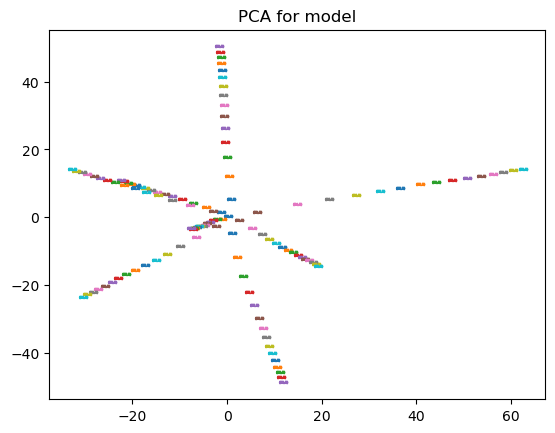

In [21]:
for i in range(final_pca.shape[0]):
    m = list(final_pca['accuracy'])[i]
    plt.scatter(final_pca['x'][i*3], final_pca['y'][i*3], marker = f'${m}$')
    plt.title("PCA for model")

In [22]:
model1=DNN1()
for name,parameter in model1.named_parameters():
    pd=[]
    params=parameter.numel()
    pd.append(name)
    pd.append(params)
    print(pd)

['l1.weight', 15680]
['l1.bias', 20]
['l2.weight', 400]
['l2.bias', 20]
['l3.weight', 200]
['l3.bias', 10]


In [23]:
layer1 = weights_df.iloc[ : , 0:15680]
df=np.array(layer1)
pca = PCA(n_components=2)
pca_ = pca.fit_transform(df)
print(pca_)
pca_df=pd.DataFrame(pca_,columns=['x','y'])
pca_df["accuracy"]=accuracy_list
pca_df["loss"]=loss_list
print(pca_df)

[[-1.09360301e+00  1.31192565e+00]
 [-2.14367723e+00  1.88867915e+00]
 [-3.29237556e+00  2.41514182e+00]
 [-4.33646154e+00  2.85444188e+00]
 [-5.36114120e+00  3.33517647e+00]
 [-6.25140190e+00  3.73543501e+00]
 [-6.98633051e+00  4.14188814e+00]
 [-7.83759832e+00  4.53834105e+00]
 [-8.63643074e+00  4.92855644e+00]
 [-9.37895584e+00  5.28415537e+00]
 [-1.01412086e+01  5.59872961e+00]
 [-1.08060932e+01  5.86394024e+00]
 [-1.14574623e+01  6.13414049e+00]
 [-1.20312614e+01  6.36139488e+00]
 [-1.25915384e+01  6.55962420e+00]
 [-1.31446085e+01  6.82263327e+00]
 [-1.37449732e+01  6.94289303e+00]
 [-1.42350883e+01  7.10060883e+00]
 [-1.47794161e+01  7.36590719e+00]
 [-1.51533842e+01  7.60605097e+00]
 [-1.55697746e+01  7.79517746e+00]
 [-1.60269585e+01  7.99635649e+00]
 [-1.63991089e+01  8.20567131e+00]
 [-1.67862129e+01  8.35924530e+00]
 [-1.72265644e+01  8.41163063e+00]
 [-1.76251888e+01  8.64095497e+00]
 [-1.78658371e+01  8.74047565e+00]
 [-1.82258415e+01  8.85976601e+00]
 [-1.85801353e+01  9

AttributeError: 'list' object has no attribute 'DataFrame'

In [24]:
final_pca = pca_df.iloc[::3, :]
print(final_pca)

             x          y accuracy            loss
0    -1.246032   1.387841  (79, 3)  tensor(0.6981)
3    -4.476725   2.922434  (94, 3)  tensor(0.2066)
6    -7.116060   4.232041  (96, 3)  tensor(0.1473)
9    -9.487729   5.370569  (96, 3)  tensor(0.1186)
12  -11.547035   6.219407  (97, 3)  tensor(0.1052)
..         ...        ...      ...             ...
345 -28.172710  12.268792  (98, 3)  tensor(0.0735)
348 -29.539953  12.755476  (98, 3)  tensor(0.0715)
351 -30.731857  13.222735  (98, 3)  tensor(0.0721)
354 -31.905476  13.651804  (98, 3)  tensor(0.0657)
357 -32.866573  14.078300  (98, 3)  tensor(0.0641)

[120 rows x 4 columns]


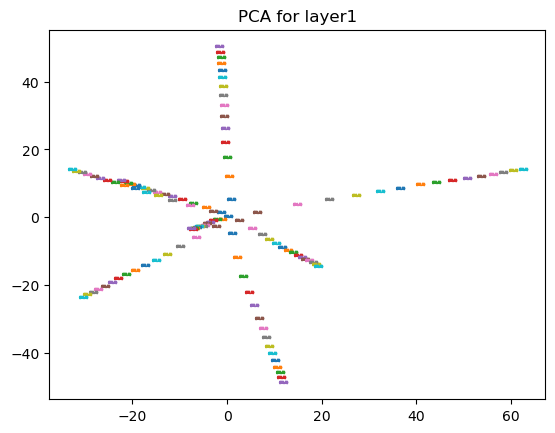

In [25]:
for i in range(final_pca.shape[0]):
    m = list(final_pca['accuracy'])[i]
    plt.scatter(final_pca['x'][i*3], final_pca['y'][i*3], marker = f'${m}$')
    plt.title("PCA for layer1")